## Classificando textos com machine learning

Este notebook tem como foco a classificação do texto em uma determinada categoria, utilizando técnicas de NLP.

Usaremos dois modelos (SVM estimando em SGDClassifier e uma Rede Neural Multicamadas).

Usaremos o dataset 20Neesgroups)

## Importando nossas classes, o dataset e demais funções

In [1]:
#IMPORTA O DATASET
from sklearn.datasets import fetch_20newsgroups 

#Converte o texto bruto em forma vetorizada (Matriz esparsa)
#TFID - Calcula a importancia da palavra
from sklearn.feature_extraction.text import TfidfVectorizer 

# Um classificador linear que utiliza o Gradiente Descendente Estocástico como método de treino. Por padrão, utiliza o estimador SVM.
from sklearn.linear_model import SGDClassifier

# Uma rede neural Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier

#Importa as metricas para avaliação
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Importação para plotar os dados para melhor visualização / Análise
import matplotlib.pyplot as plt
%matplotlib inline

## Limitando a quantidade de categorias e obtendo os dados de treino

Apenas por uma questão de agilidade, iremos reduzir a quantidade de dados a serem processados. Conseguiremos isto ao limitar o número de categorias em apenas duas. Nosso modelo classificará textos na área de ***política*** e ***automobilismo***. Você pode escolher qualquer uma das categorias ilustradas na imagem anterior, ou utilizar todas elas :-).

In [2]:
categories = ['talk.politics.misc', 'rec.autos']
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

## Obtendo alguns feedbacks sobre os dados

In [3]:
# Nomes das categorias
print(twenty_train.target_names)

['rec.autos', 'talk.politics.misc']


In [5]:
# O scikit-learn carrega os rótulo como um array de inteiros....
twenty_train.target[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [6]:
# Mas, é possível visualizar os nomes das categorias da seguinte forma
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

talk.politics.misc
talk.politics.misc
talk.politics.misc
rec.autos
talk.politics.misc
talk.politics.misc
rec.autos
talk.politics.misc
talk.politics.misc
talk.politics.misc


In [7]:
type(twenty_train)

sklearn.utils.Bunch

## Treinando o classificador

Dados textuais representam valores discretos, e nosso classificador "só entende números". Nós precisamos converter os dados brutos, que estão em formato de texto, para uma formato numérico. Isto deve acontecer antes de podermos passar os dados para o nosso classificador.

É preciso levar em conta, ainda, que algumas palavras no corpus de treino serão muito presentes, como é o caso de preposições e artigos. Estas palavras tendem a se repetir em todos os documentos e não costumam carregar informação muito significativa para o que precisamos aqui. Nós utilizaremos a medidade TF-IDF para limitar a importância destas palavras que se repetem muito ao longo dos documentos, de maneira que elas não causem mais influência do que o necessário. TF-IDF significa **_frequência do termo–inverso da frequência nos documentos_** e se baseia na seguinte formula.

In [8]:
vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = vectorizer.fit_transform(twenty_train.data)

In [9]:
type(X_train_tfidf_vectorize)

scipy.sparse.csr.csr_matrix

Abaixo, nós iniciamos o processo de treino do nosso classificador, o que corresponderia a ajustar o estimador aos dados que nós temos. Iremos testar dois estimadores: ***SGDClassifier*** e ***MLPClassifier***, que nada mais é do que uma rede neural Perceptron Multicamadas.

In [10]:
# Aqui nós treinamos o classificador
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
clf.fit(X_train_tfidf_vectorize, twenty_train.target) 

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

## Avaliando a performance

In [11]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data

vect_transform = vectorizer.transform(docs_test)
predicted = clf.predict(vect_transform)


print(metrics.classification_report(twenty_test.target, predicted,target_names=twenty_test.target_names))

print(clf.classes_)

                    precision    recall  f1-score   support

         rec.autos       0.93      0.99      0.96       396
talk.politics.misc       0.99      0.90      0.94       310

          accuracy                           0.95       706
         macro avg       0.96      0.95      0.95       706
      weighted avg       0.95      0.95      0.95       706

[0 1]


***Matriz de confusão*** – usada para visualizar a performance de um classificador. As linhas da matriz indicam as classes que se espera obter corretamente por meio do modelo. As colunas indicam as classes que foram obtidas efetivamente. Cada célula contém o número de predições feitas pelo classificador, relativas ao contexto daquela célula específica.

In [12]:
confusion_matrix = confusion_matrix(twenty_test.target, predicted)
print(confusion_matrix)


[[392   4]
 [ 30 280]]


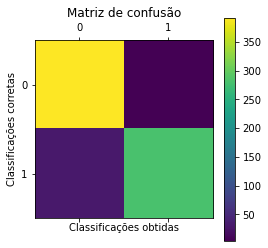

In [13]:
plt.matshow(confusion_matrix)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

## Predição em novos dados

In [14]:
docs_new = [
    'This morning President Joe Biden called a meeting with senators to discuss health issues.',
    'The new release of chevrolet has a very powerful engine, but this vehicle is very expensive.'
]

X_new_tfidf_vectorize = vectorizer.transform(docs_new)

predicted = clf.predict(X_new_tfidf_vectorize)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'This morning President Joe Biden called a meeting with senators to discuss health issues.' => talk.politics.misc
'The new release of chevrolet has a very powerful engine, but this vehicle is very expensive.' => rec.autos
